# Comparing performance of spec2vec in relation with Tanimoto in different percentiles

The following space dimensionalities were used: 2, 50, 100, 300, 500, 600, 650, 700, 750, 800, 100 and 1200.

The diagonal is ignored every time the percentile value is obtained.


In [48]:
import os
import sys

ROOT = os.path.dirname(os.getcwd())
path = os.path.join(os.path.dirname(os.getcwd()), "data")
sys.path.insert(0, ROOT)

## Retrieving Tanimoto similarity scores

In [49]:
import numpy as np 

filename = os.path.join(path, "gcms_similarities_filter05_morgan3_2048_dice.npy")
matrix_similarities_tanimoto = np.load(filename)

## Obtaining the scores of the different spec2vec dimensionalities

In [50]:
x_dimensions = [2, 50, 100, 300, 500, 600, 650, 700, 750, 800, 1000, 1200]
matrix_similarities_spec2vec_list = []

for s in x_dimensions:
    filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_size" + str(s) + ".npy")
    matrix_similarities_spec2vec_list.append(np.load(filename))

## Method to obtain the average similarity score of certain percentile

In [51]:
import re
import unidecode
import numpy as np
from matplotlib import pyplot as plt

def plot_precentile(arr_ref, arr_sim, percentile_rn, ignore_diagonal=False):
    ## Code inspired by Florian Huber's jupyter notebook to compute top percentile average similarity score
    ## https://github.com/iomega/spec2vec_gnps_data_analysis/blob/master/custom_functions/plotting_functions.py
    
    
    # function to search and obtain nan elemnts and delete them
    # First checks if the arrays has the same length
    # Then obtaines the indexes of the elements that are not nan of the reference array
    # Then overwrites both arrays without the position on which were nans in the reference array
    def _ignore_reference_nans(arr_ref, arr_sim):
        assert arr_ref.shape == arr_sim.shape, "Expected two arrays of identical shape."
        idx_not_nans = np.where(np.isnan(arr_ref) == False)
        arr_sim = arr_sim[idx_not_nans]
        arr_ref = arr_ref[idx_not_nans]
        return arr_ref, arr_sim

    # If true replace the elements in the diagonal with NaN
    if ignore_diagonal:
        np.fill_diagonal(arr_ref, np.nan)

    # Call to this method to remove the NaN elements from the arrays
    arr_ref, arr_sim = _ignore_reference_nans(arr_ref, arr_sim)

    # Obtain the index position according to the percentile
    start = int(arr_sim.shape[0] * percentile_rn / 100)
    idx = np.argpartition(arr_sim, -start)
    starting_point = arr_sim[idx[-start]]
    if starting_point == 0:
        print("not enough datapoints != 0 above given top-precentile")

    # Obtain only the elements on the given percentile
    low_as = np.where(arr_sim == starting_point)[0]

    # Set the length of the array to the length of the new list with the percentile elements
    length_selected = low_as.shape[0]  # start+1

    # Create a new array of zeros where the elements of array_ref and array_sim will be added
    data = np.zeros((2, length_selected))
    # Add arr_sim values to first position and arr_ref to second position
    data[0, :] = arr_sim[low_as]
    data[1, :] = arr_ref[low_as]

    # Order the data according to arr_sim scores
    data = data[:, np.lexsort((data[1, :], data[0, :]))]

    ref_score_cum = []

    # Return mean molecular similarity score of arr_ref 
    return np.mean(data[1, :])

## Obtaining the average scores for the 30th percentile

In [52]:
percentile = 0.3
percentile_cosine_spec2vec2_list = []

for idx in range(len(x_dimensions)):
    percentile_cosine_spec2vec2_list.append(plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec_list[idx], percentile, ignore_diagonal=True))
    

## Plotting the average scores for the 30th percentile

No handles with labels found to put in legend.


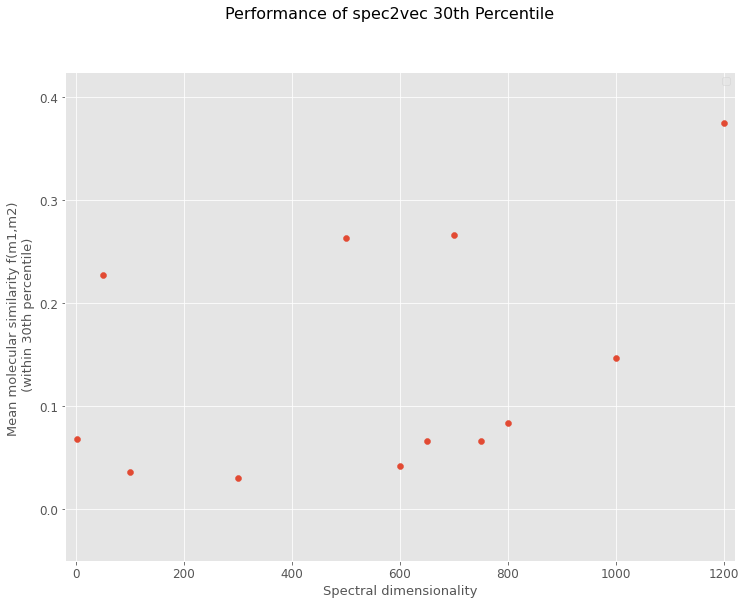

In [53]:
import matplotlib.pyplot as plt

def plot_spec2vec_performance(spec2vec_percentile_scores, dimensions, percentile):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(12,9))

    max_dimensions = max(dimensions) + 20
    
    title = 'Performance of spec2vec {0:g}th Percentile'.format(float(percentile*100))

    plt.scatter(dimensions, spec2vec_percentile_scores)

    plt.suptitle(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.xlabel("Spectral dimensionality", fontsize=13)
    plt.ylabel("Mean molecular similarity f(m1,m2) \n (within 30th percentile)", fontsize=13)
    plt.xlim(-20, max_dimensions)
    plt.ylim(-0.05, 1.05)

plot_spec2vec_performance(percentile_cosine_spec2vec2_list, x_dimensions, percentile)


## Obtaining the average scores for the 10th percentile

In [54]:
percentile = 0.1
percentile_cosine_spec2vec2_list = []

for idx in range(len(x_dimensions)):
    percentile_cosine_spec2vec2_list.append(plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec_list[idx], percentile, ignore_diagonal=True))
    

## Plotting the average scores for the 10th percentile

No handles with labels found to put in legend.


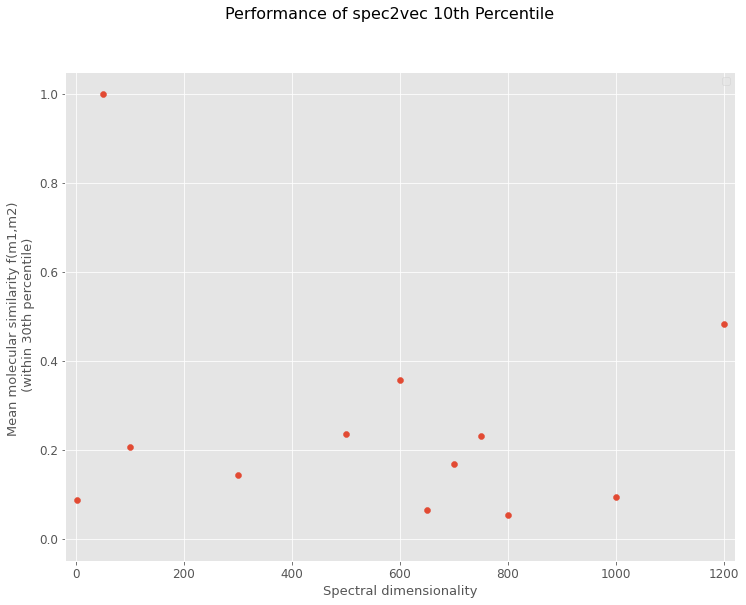

In [55]:

plot_spec2vec_performance(percentile_cosine_spec2vec2_list, x_dimensions, percentile)


## Obtaining the average scores for the 1st percentile

In [56]:
percentile = 0.01
percentile_cosine_spec2vec2_list = []

for idx in range(len(x_dimensions)):
    percentile_cosine_spec2vec2_list.append(plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec_list[idx], percentile, ignore_diagonal=True))
    

## Plotting the average scores for the 1st percentile

No handles with labels found to put in legend.


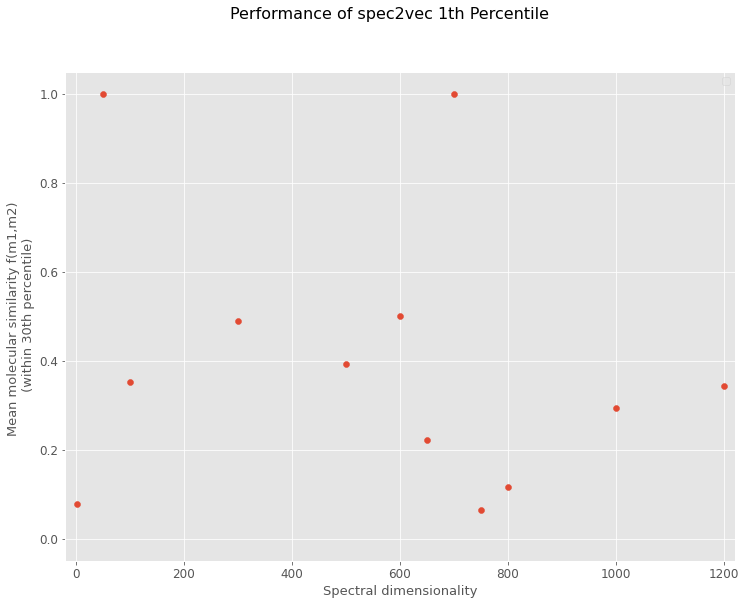

In [57]:

plot_spec2vec_performance(percentile_cosine_spec2vec2_list, x_dimensions, percentile)


## Obtaining the average scores for the 80th percentile

In [58]:
percentile = 0.8
percentile_cosine_spec2vec2_list = []

for idx in range(len(x_dimensions)):
    percentile_cosine_spec2vec2_list.append(plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec_list[idx], percentile, ignore_diagonal=True))


## Plotting the average scores for the 80th percentile

No handles with labels found to put in legend.


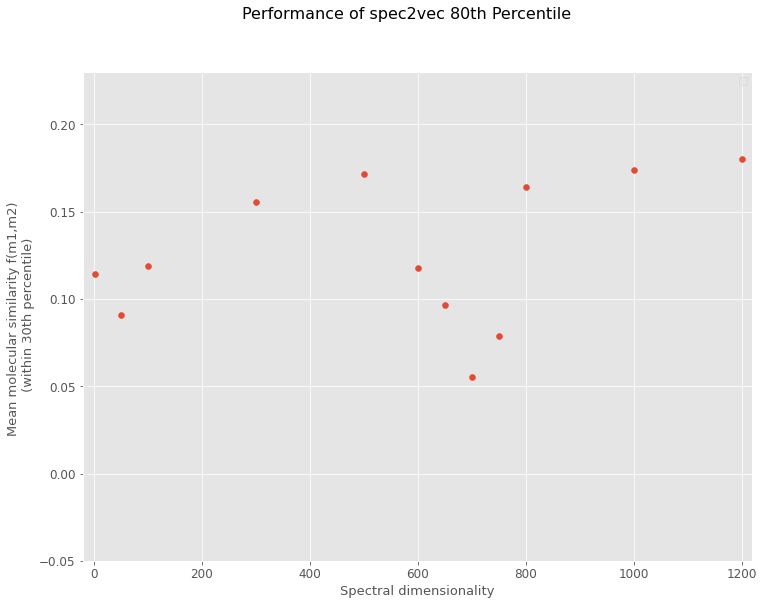

In [59]:

plot_spec2vec_performance(percentile_cosine_spec2vec2_list, x_dimensions, percentile)


## Obtaining the average scores for the 90th percentile

In [60]:
percentile = 0.9
percentile_cosine_spec2vec2_list = []

for idx in range(len(x_dimensions)):
    percentile_cosine_spec2vec2_list.append(plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec_list[idx], percentile, ignore_diagonal=True))


## Plotting the average scores for the 90th percentile

No handles with labels found to put in legend.


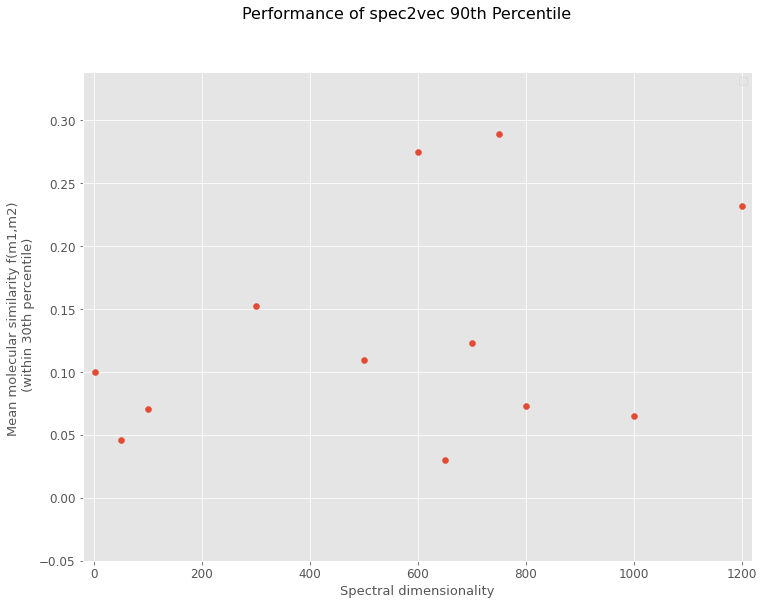

In [61]:

plot_spec2vec_performance(percentile_cosine_spec2vec2_list, x_dimensions, percentile)
